In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
file_path = "C:\\Users\\E L I T E B O O K\\Desktop\\Machine Learning\\mushroom_cleaned.csv"

In [3]:
# Завантаження датасету
df = pd.read_csv(file_path)

In [4]:
# Виведення перших 5 рядків
print(df.head(5))

   cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0          1372          2                2          10     3.807467   
1          1461          2                2          10     3.807467   
2          1371          2                2          10     3.612496   
3          1261          6                2          10     3.787572   
4          1305          6                2          10     3.711971   

   stem-width  stem-color    season  class  
0        1545          11  1.804273      1  
1        1557          11  1.804273      1  
2        1566          11  1.804273      1  
3        1566          11  1.804273      1  
4        1464          11  0.943195      1  


In [5]:
# Виведення розміру датасету (кількість рядків і стовпців)
print("Розмір датасету:", df.shape)

Розмір датасету: (54035, 9)


In [6]:
# Виведення кількості пропущених даних у кожному стовпці
print("\nПропущені дані:\n", df.isnull().sum())


Пропущені дані:
 cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64


In [7]:
# Виведення типів даних для кожного стовпця
print("\nТипи даних:\n", df.dtypes)


Типи даних:
 cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object


In [8]:
# Виведення матриці кореляції
correlation_matrix = df.corr()

# Виведення матриці
print(correlation_matrix)

                 cap-diameter  cap-shape  gill-attachment  gill-color  \
cap-diameter         1.000000   0.204011         0.200481    0.186377   
cap-shape            0.204011   1.000000         0.043066    0.131387   
gill-attachment      0.200481   0.043066         1.000000    0.100276   
gill-color           0.186377   0.131387         0.100276    1.000000   
stem-height          0.135652  -0.010393        -0.075284    0.015057   
stem-width           0.828469   0.222494         0.245300    0.110283   
stem-color           0.121856   0.029035         0.020073    0.186090   
season               0.113334   0.055442        -0.040315    0.059965   
class               -0.165676  -0.133338        -0.052541   -0.063947   

                 stem-height  stem-width  stem-color    season     class  
cap-diameter        0.135652    0.828469    0.121856  0.113334 -0.165676  
cap-shape          -0.010393    0.222494    0.029035  0.055442 -0.133338  
gill-attachment    -0.075284    0.245300    

In [9]:
# Виведення кореляції з цільовою змінною 'class'
correlation_with_target = df.corr()['class'].sort_values(ascending=False)

# Виведення кореляції
print("Кореляція з цільовою змінною 'class':\n", correlation_with_target)

Кореляція з цільовою змінною 'class':
 class              1.000000
stem-height        0.183354
gill-attachment   -0.052541
gill-color        -0.063947
season            -0.082919
stem-color        -0.128339
cap-shape         -0.133338
cap-diameter      -0.165676
stem-width        -0.182856
Name: class, dtype: float64


In [10]:
# Визначення ознак (X) і цільової змінної (y)
X = df.drop('class', axis=1)  
y = df['class']

In [11]:
# Розподіл на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Випадковий ліс
rf_model = RandomForestClassifier()

# Параметри для підбору
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

In [13]:
# Grid Search
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

# Найкращі параметри
print("Найкращі параметри для випадкового лісу:", rf_grid_search.best_params_)


Найкращі параметри для випадкового лісу: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


In [14]:
# Оцінка на тестовій вибірці
rf_best_model = rf_grid_search.best_estimator_
rf_predictions = rf_best_model.predict(X_test)

print("Точність випадкового лісу:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

Точність випадкового лісу: 0.9912094013139632
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4909
           1       0.99      0.99      0.99      5898

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807



In [15]:
# Логістична регресія
log_model = LogisticRegression(max_iter=500)

# Зменшені параметри для підбору
log_param_grid = {
    'C': [0.1, 1],
    'solver': ['lbfgs']  # Використовуємо один алгоритм
}


In [16]:
# Grid Search
log_grid_search = GridSearchCV(log_model, log_param_grid, cv=3, scoring='accuracy')
log_grid_search.fit(X_train, y_train)

# Найкращі параметри
print("Найкращі параметри для логістичної регресії:", log_grid_search.best_params_)

D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Найкращі параметри для логістичної регресії: {'C': 0.1, 'solver': 'lbfgs'}


In [17]:
# Оцінка на тестовій вибірці
log_best_model = log_grid_search.best_estimator_
log_predictions = log_best_model.predict(X_test)

print("Точність логістичної регресії:", accuracy_score(y_test, log_predictions))
print(classification_report(y_test, log_predictions))

Точність логістичної регресії: 0.6351438882205978
              precision    recall  f1-score   support

           0       0.61      0.53      0.57      4909
           1       0.65      0.72      0.68      5898

    accuracy                           0.64     10807
   macro avg       0.63      0.63      0.63     10807
weighted avg       0.63      0.64      0.63     10807



Найкраща модель: Випадковий ліс
Точність: 0.9912094013139632

Матриця плутанини:
 [[4857   52]
 [  43 5855]]

Класифікаційний звіт:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4909
           1       0.99      0.99      0.99      5898

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807



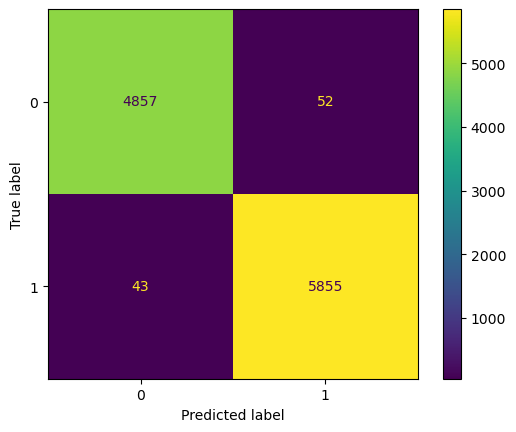

In [20]:
# Оцінка та вибір найкращої моделі
rf_accuracy = accuracy_score(y_test, rf_predictions)
log_accuracy = accuracy_score(y_test, log_predictions)

if rf_accuracy > log_accuracy:
    best_model = rf_best_model
    best_model_name = "Випадковий ліс"
    best_predictions = rf_predictions
else:
    best_model = log_best_model
    best_model_name = "Логістична регресія"
    best_predictions = log_predictions

# Виведення метрик
print(f"Найкраща модель: {best_model_name}")
print("Точність:", accuracy_score(y_test, best_predictions))
print("\nМатриця плутанини:\n", confusion_matrix(y_test, best_predictions))
print("\nКласифікаційний звіт:\n", classification_report(y_test, best_predictions))

# Візуалізація матриці плутанини
ConfusionMatrixDisplay(confusion_matrix(y_test, best_predictions)).plot()

In [22]:

# Визначення ознак (виберіть числові ознаки)
X = df.select_dtypes(include=[np.number])

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_

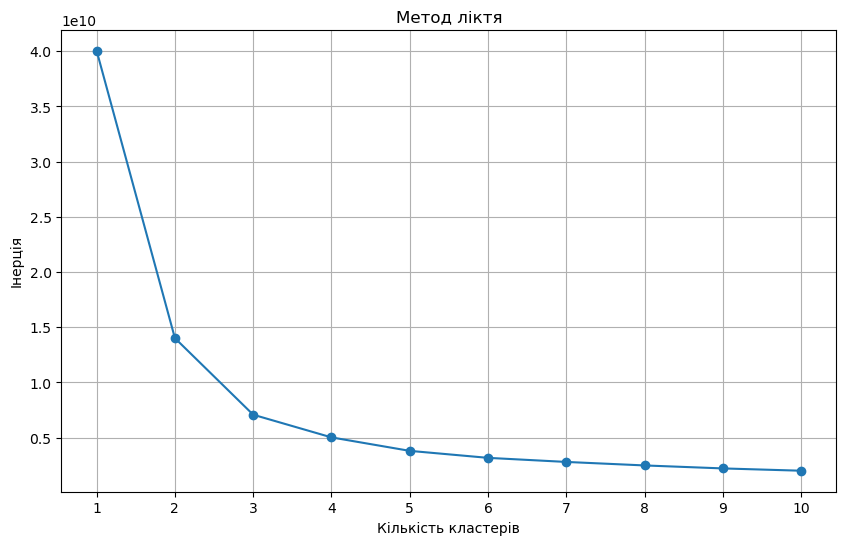

In [23]:
# Метод ліктя
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Візуалізація
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.xticks(K)
plt.grid()
plt.show()

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

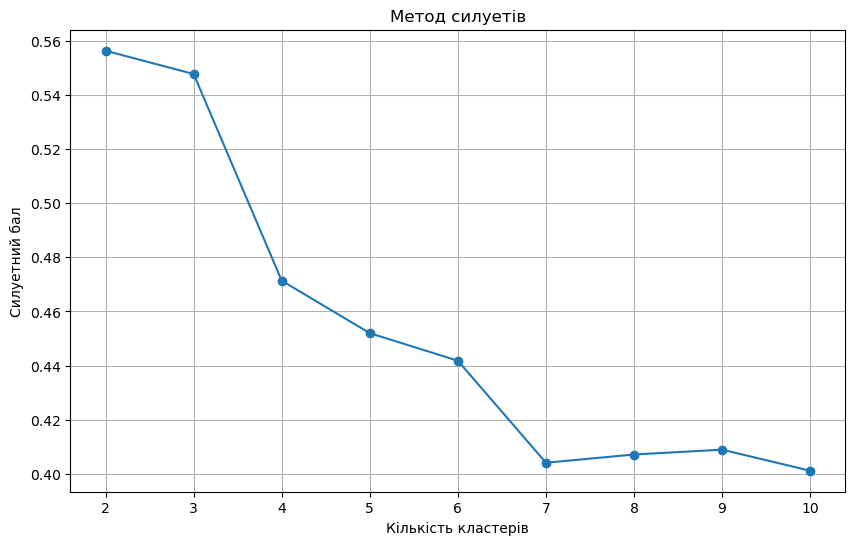

In [24]:
# Метод силуетів
silhouette_scores = []

for k in K[1:]:  # починаємо з 2, оскільки силует для 1 кластеру не має сенсу
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Візуалізація
plt.figure(figsize=(10, 6))
plt.plot(K[1:], silhouette_scores, marker='o')
plt.title('Метод силуетів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Силуетний бал')
plt.xticks(K[1:])
plt.grid()
plt.show()

In [30]:
# Стандартизація даних
X_scaled = StandardScaler().fit_transform(X)

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


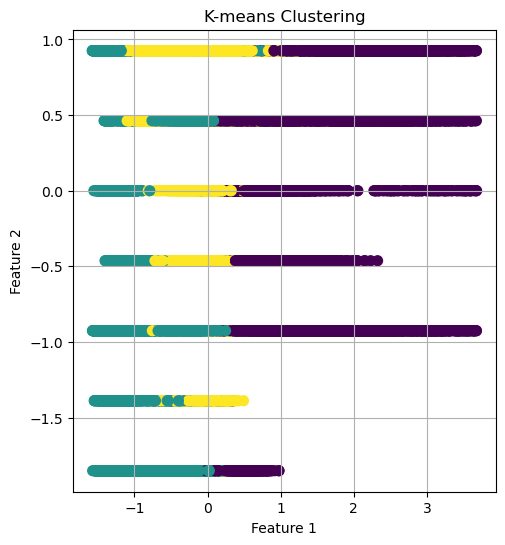

In [31]:
# K-means
kmeans = KMeans(n_clusters=3, random_state=42)  
kmeans.fit(X_scaled)

# Візуалізація
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', s=50)
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()

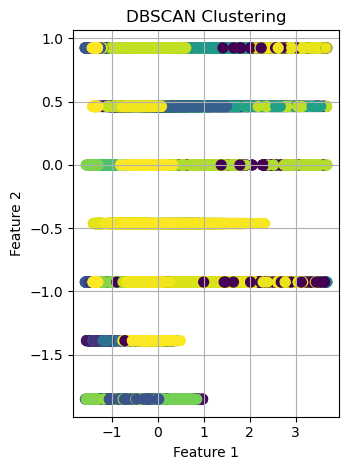

In [32]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  
dbscan.fit(X_scaled)

# Візуалізація
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan.labels_, cmap='viridis', marker='o', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()

plt.tight_layout()
plt.show()